In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [22]:
data=pd.read_csv('mushrooms.csv')

In [23]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [24]:
data.shape

(8124, 23)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [26]:
#checking null values
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No null values are in this dataset

In [27]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [28]:
data.rename(columns = {'class':'group'}, inplace = True)

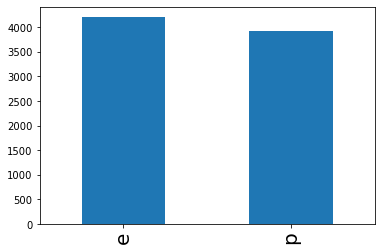

In [29]:
data.group.value_counts().plot(kind='bar')
plt.xticks(fontsize=20)
plt.show()

There are almost similar number of edible as well as poisonous mushrooms in this dataset

<AxesSubplot:ylabel='habitat'>

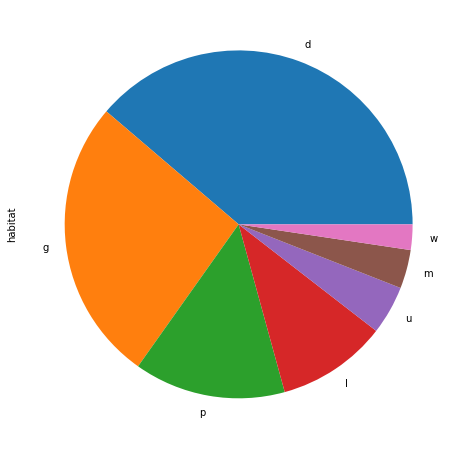

In [30]:
data.habitat.value_counts().plot(kind='pie',figsize=(10,8))

The pie chart reveals that most mushrooms are found in woods

<AxesSubplot:>

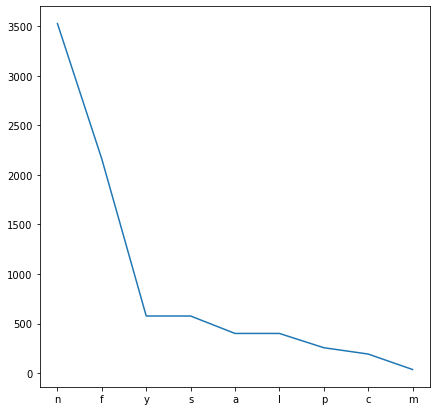

In [31]:
data.odor.value_counts().plot(kind='line',figsize=(7,7))

The above shows that majority of mushrooms have no odour

<AxesSubplot:>

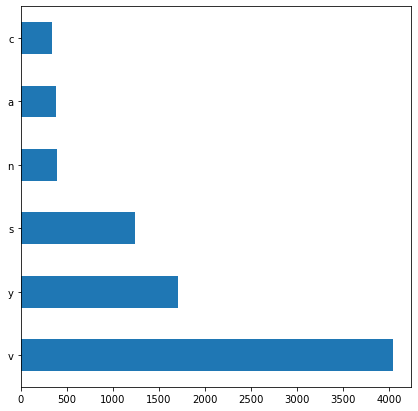

In [32]:
data.population.value_counts().plot(kind='barh',figsize=(7,7))

The above graph shows the population of mushroom is highest in several and then in solitary

In [33]:
# Perform label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in data:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [34]:
data

,group,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


<AxesSubplot:>

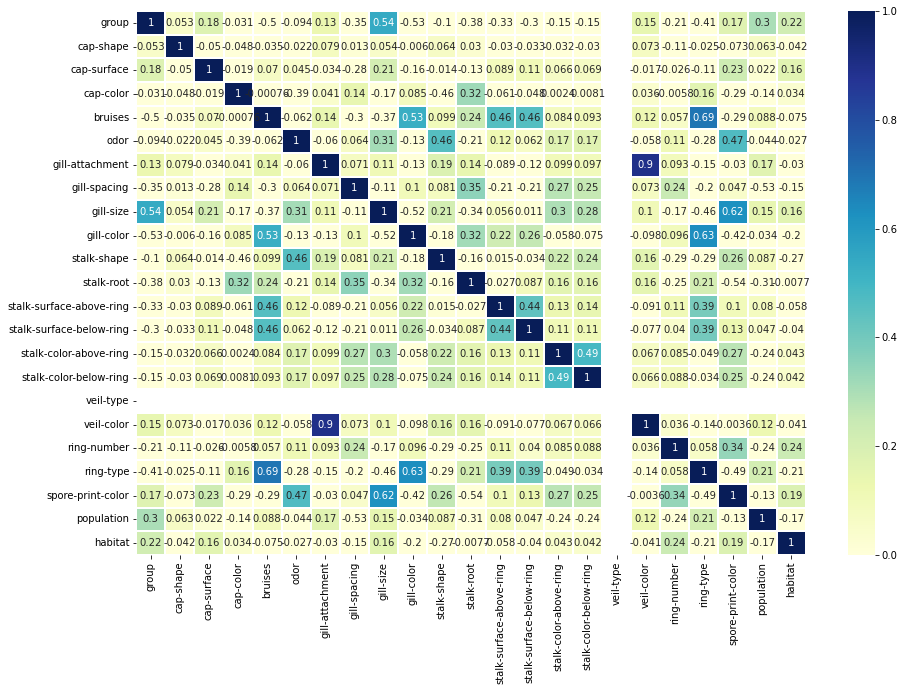

In [35]:
corr=data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr,vmin=-0,vmax=1,annot=True,linewidth=0.2,cmap='YlGnBu')

# Modelling

In [36]:
y=data['group']
x=data.drop(['group'],axis=1)

In [37]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# LOGISTIC REGRESSION

In [38]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_model= log_reg.fit(x_train,y_train)
pred_lr= log_model.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [40]:
f1_lr=f1_score(y_test, pred_lr)*100
f1_lr

94.51530612244898

In [41]:
acc_lr= accuracy_score(y_test, pred_lr)*100
acc_lr

94.7076923076923

# KNN

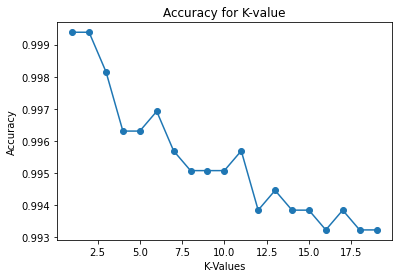

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score,confusion_matrix
acc_values=[]
neighbors= np.arange(1,20)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    knn_model= classifier.fit(x_train,y_train)
    y_predict= knn_model.predict(x_test)
    acc= accuracy_score(y_test,y_predict)
    acc_values.append(acc)
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.title('Accuracy for K-value')
plt.show()

In [43]:
classifier= KNeighborsClassifier(n_neighbors=2,metric='minkowski')
knn_model= classifier.fit(x_train,y_train)
y_predict= knn_model.predict(x_test)

In [44]:
f1_knn=f1_score(y_test,y_predict)*100
f1_knn

99.93610223642173

In [45]:
acc_knn= accuracy_score(y_test,y_predict)*100
acc_knn

99.93846153846154

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf= rf.predict(x_test)

In [47]:
f1_rf=f1_score(y_test,pred_rf)*100
f1_rf

100.0

In [48]:
acc_rf= accuracy_score(y_test,pred_rf)*100
acc_rf

100.0

# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_model= dt.fit(x_train,y_train)
pred3= dt_model.predict(x_test)

In [50]:
f1_dt=f1_score(y_test,pred3)*100
f1_dt

100.0

In [51]:
acc_dt= accuracy_score(y_test,pred3)*100
acc_dt

100.0

# SVM model

In [52]:
from sklearn.svm import SVC
svm_linear = SVC(kernel="linear")
svm_linear.fit(x_train, y_train)
pred_svm=svm_linear.predict(x_test)
f1_svm=f1_score(y_test,pred_svm)*100
f1_svm

97.15762273901808

In [53]:
acc_svm= accuracy_score(y_test,pred_svm)*100
acc_svm

97.29230769230769

# Gaussian Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
#prediction of the test set result:
pred_gnb=classifier.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,pred_gnb)
acc_gnb=accuracy_score(y_test,pred_gnb)*100
f1_gnb=f1_score(y_test,pred_gnb)*100
cm

array([[771,  72],
       [ 55, 727]])

In [56]:
acc_gnb

92.18461538461538

In [57]:
f1_gnb

91.96710942441493

# Bernoulli Naive Bayes

In [58]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(x_train,y_train)

BernoulliNB()

In [59]:
#prediction of the test set result:
y_pred_bnb=classifier.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred_bnb)
acc_bnb=accuracy_score(y_test,y_pred_bnb)*100
f1_bnb=f1_score(y_test,y_pred_bnb)*100
cm

array([[797,  46],
       [211, 571]])

In [61]:
acc_bnb

84.18461538461538

In [62]:
f1_bnb

81.62973552537527

In [63]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','Random Forest',
              'Decision Tree','SVM',
              'Gaussian Naive Bayes','Bernoulli Naive Bayes'],
    'f1-Score': [ f1_lr,f1_knn, f1_rf,
                 f1_dt,f1_svm,
                f1_gnb,f1_bnb],
    'Accuracy_score':[ acc_lr, acc_knn, 
                      acc_rf,acc_dt,acc_svm,
                      acc_gnb,acc_bnb
                     ]})

In [64]:
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df.reset_index(drop=True,inplace=True)
result_df.head(10)

,Model,f1-Score,Accuracy_score
0,Random Forest,100.000000,100.000000
1,Decision Tree,100.000000,100.000000
2,KNN,99.936102,99.938462
3,SVM,97.157623,97.292308
4,Logistic Regression,94.515306,94.707692
5,Gaussian Naive Bayes,91.967109,92.184615
6,Bernoulli Naive Bayes,81.629736,84.184615


The above table shows the f1 score and accuracy of different ML models